In [1]:
import json


In [2]:
root = "/home/ww/projects/wwdet_mmd/work_dirs/yunet_yolox_shared_stack_1_randomcrop/sample_statics.json"
content = []
with open(root, 'r') as f:

    content = json.load(f)
content.keys()

dict_keys(['datetime:', 'Batch_size', 'Total_sample', 'Noimg', 'Shapeless2', 'data'])

In [3]:
size_data = content['data']
size_data

{'44,58': 8482,
 '42,58': 6145,
 '52,63': 4139,
 '489,446': 5,
 '429,498': 26,
 '105,133': 865,
 '101,120': 652,
 '100,131': 1319,
 '85,122': 1036,
 '85,109': 1283,
 '73,110': 629,
 '90,114': 1148,
 '54,60': 4094,
 '121,94': 156,
 '212,280': 63,
 '234,438': 1,
 '28,28': 14417,
 '82,126': 768,
 '48,51': 4819,
 '39,56': 8653,
 '40,40': 7423,
 '162,200': 602,
 '218,306': 187,
 '85,139': 329,
 '93,121': 1418,
 '58,80': 3360,
 '56,94': 824,
 '51,80': 1439,
 '63,99': 547,
 '56,79': 3808,
 '55,78': 2788,
 '61,89': 1617,
 '93,71': 252,
 '53,86': 775,
 '46,76': 1088,
 '98,61': 31,
 '62,62': 2593,
 '82,95': 786,
 '31,54': 1627,
 '21,21': 24214,
 '21,25': 51699,
 '17,19': 48559,
 '12,12': 84363,
 '14,17': 121151,
 '54,35': 323,
 '57,97': 415,
 '59,103': 726,
 '71,118': 316,
 '18,21': 67814,
 '80,95': 1315,
 '28,34': 27089,
 '22,27': 59302,
 '5,11': 19629,
 '10,15': 121487,
 '11,15': 158972,
 '8,9': 186356,
 '5,9': 84490,
 '7,10': 219748,
 '10,11': 140371,
 '6,9': 176260,
 '7,13': 26927,
 '8,11': 

In [5]:
x = []
y = []
z = []
bbox = []
for k, v in size_data.items():
    wh = k.split(',')
    w, h = int(wh[0]), int(wh[1])        
    x.append(w)
    y.append(h)
    z.append(v)
    bbox.append({'w': w, 'h': h, 'num': v})
max(x), max(y)

(640, 640)

In [6]:
bbox.sort(key=lambda x: x.get('num'), reverse=True)
# print(bbox)

In [7]:
cat = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 100, 150, 200]
cat2 = [_ ** 2 for _ in cat]
catname = [f'<{cat[0]}']
for i in range(1, len(cat)):
    catname.append(f"{cat[i - 1]}~{cat[i]}")
catname.append(f'>{cat[-1]}')
cat_dict = {}
for n in catname:
    cat_dict[n] = 0
for b in bbox:
    area = b['w'] * b['h']
    for i in range(len(cat2)):
        if area < cat2[i]:
            cat_dict[catname[i]] += b['num']
            break
    else:
        # print(b, area, cat2[i], i, catname[i])
        cat_dict[catname[-1]] += b['num']

In [8]:
cat_dict

{'<5': 1065761,
 '5~10': 5007883,
 '10~15': 4622999,
 '15~20': 3552987,
 '20~25': 2673088,
 '25~30': 2077283,
 '30~35': 1675562,
 '35~40': 1377817,
 '40~50': 2092160,
 '50~60': 1467564,
 '60~70': 1088521,
 '70~80': 825345,
 '80~100': 1197751,
 '100~150': 1621873,
 '150~200': 826204,
 '>200': 1799704}

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# xpos = np.array(x)
# ypos = np.array(y)
# zpos = np.zeros_like(xpos)

# # Construct arrays with the dimensions for the 16 bars.
# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = np.array(z)

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# plt.show()

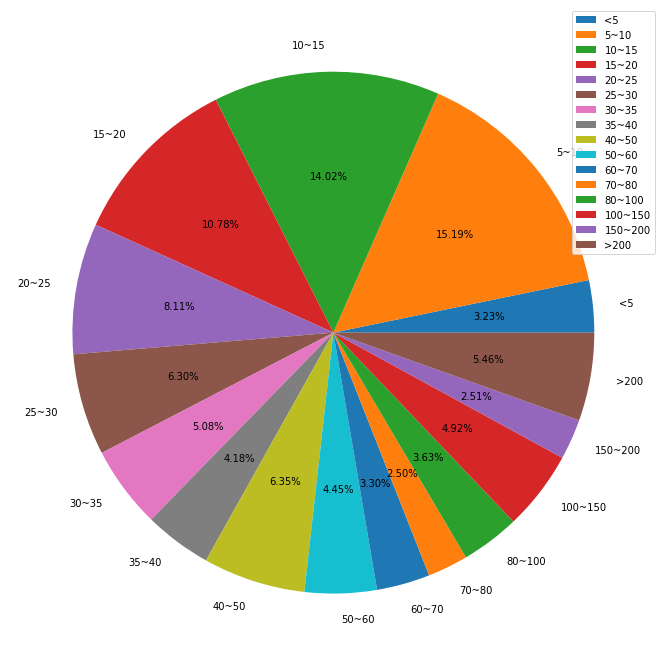

In [11]:
labels, vals = [], []
for k, v in cat_dict.items():
    labels.append(k)
    vals.append(v)
plt.figure(figsize=(12, 12))
plt.pie(vals,
        labels=labels,
        autopct='%.2f%%')
plt.legend()
plt.show()